# GRIP @ THE SPARKS FOUNDATION

# DATA SCIENCE AND BUSINESS ANALYTICS INTERN

# Task 3- Exploratory Data Analysis

# By- SANGITA POKHREL

**Perform 'Exploratory Data Analysis' on dataset 'Global Terrorism'**

**Import required libraries**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import os
import mpl_toolkits
import json
print('Libraries are imported Successfully')

Libraries are imported Successfully


**Importing the dataset**


In [14]:
df = pd.read_csv('globalterrorism.csv',encoding='ISO-8859-1')


In [15]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [17]:
df.shape

(181691, 135)

# Cleaning or pre-processing of data


In [18]:
# Taking only wanted data so choosing the wanted column required for performing EDA
usecols= [1, 5, 8, 10, 11, 12, 13, 14, 25, 26, 27, 29, 35, 58, 69, 71, 82, 98, 100, 101, 103, 104, 106]
renamescols= {
      'iyear': 'uyear',
       'country_txt' : 'country_txtt',
        'region_txt' : 'region_txtt',
         'latitude': 'lat',
          'longittude': 'long',
         'provstate':  'provsstate',
          'attacktype1_txt' : 'attackedtype1',
          'targtypet1_txt' : 'targettype1',
           'weaptype1_txt' :  'weapontype',
            'nperps' : 'nperhps',
             'nkill' : 'nkilled',
             'nkillter': 'nkilledter',
             'nwound' : 'nwounded',
             'nwondte': 'nwondedte',
              'propextent_txt' : 'propertyextent'
          
     
}

In [19]:
#Reading the dataset
df =pd.read_csv('globalterrorism.csv',encoding= 'ISO-8859-1', usecols=usecols)
df.rename(columns=renamescols, inplace =True)
print('Data read Successfully')

Data read Successfully


In [20]:
df

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0.0,1,...,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,...,23rd of September Communist League,7.0,NaN,Unknown,0.0,NaN,0.0,NaN,0,NaN
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,...,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0,NaN
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,...,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,1,NaN
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,...,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0.0,1,...,Al-Shabaab,-99.0,1.0,Firearms,1.0,0.0,2.0,0.0,-9,NaN
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0.0,1,...,Muslim extremists,-99.0,0.0,Explosives,2.0,0.0,7.0,0.0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0.0,1,...,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0.0,0,...,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,-9,NaN


In [21]:
# Removing the unknowns values from the columnns
df=df[pd.notnull(df.lat)]
df=df[pd.notnull(df.longitude)]
print("Unknown values are removed from the columns")

Unknown values are removed from the columns


In [22]:
# Number of Duplicate Values in the dataset
df.duplicated().sum()

21123

In [23]:
#Removal of Duplicated values
df.drop_duplicates(keep=False,inplace=True)

In [24]:
# Checking Null Values in the dataset
df.isnull().sum()

uyear                 0
extended              0
country_txtt          0
region_txtt           0
provsstate          409
city                366
lat                   0
longitude             0
multiple              1
success               0
suicide               0
attackedtype1         0
targtype1_txt         0
gname                 0
nperhps           51729
claimed           47212
weapontype            0
nkilled            7555
nkilledter        48051
nwounded          12494
nwoundte          50093
property              0
propertyextent    94965
dtype: int64

In [25]:
df.fillna(0)


,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,0.0,1,...,MANO-D,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,...,23rd of September Communist League,7.0,0.0,Unknown,0.0,0.0,0.0,0.0,0,0
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,...,Unknown,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,...,Unknown,0.0,0.0,Explosives,0.0,0.0,0.0,0.0,1,0
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,...,Unknown,0.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0.0,1,...,Al-Shabaab,-99.0,1.0,Firearms,1.0,0.0,2.0,0.0,-9,0
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0.0,1,...,Muslim extremists,-99.0,0.0,Explosives,2.0,0.0,7.0,0.0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0.0,1,...,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0.0,0,...,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,-9,0


In [26]:
df.isnull()


,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,True,False,True,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,False,True,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,True,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
181688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
181689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [27]:
df.isnull().sum()


uyear                 0
extended              0
country_txtt          0
region_txtt           0
provsstate          409
city                366
lat                   0
longitude             0
multiple              1
success               0
suicide               0
attackedtype1         0
targtype1_txt         0
gname                 0
nperhps           51729
claimed           47212
weapontype            0
nkilled            7555
nkilledter        48051
nwounded          12494
nwoundte          50093
property              0
propertyextent    94965
dtype: int64

In [28]:
df.fillna((0),inplace =True)
df.isnull().sum()


uyear             0
extended          0
country_txtt      0
region_txtt       0
provsstate        0
city              0
lat               0
longitude         0
multiple          0
success           0
suicide           0
attackedtype1     0
targtype1_txt     0
gname             0
nperhps           0
claimed           0
weapontype        0
nkilled           0
nkilledter        0
nwounded          0
nwoundte          0
property          0
propertyextent    0
dtype: int64

In [29]:
df

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,0.0,1,...,MANO-D,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,...,23rd of September Communist League,7.0,0.0,Unknown,0.0,0.0,0.0,0.0,0,0
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,...,Unknown,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,...,Unknown,0.0,0.0,Explosives,0.0,0.0,0.0,0.0,1,0
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,...,Unknown,0.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0.0,1,...,Al-Shabaab,-99.0,1.0,Firearms,1.0,0.0,2.0,0.0,-9,0
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0.0,1,...,Muslim extremists,-99.0,0.0,Explosives,2.0,0.0,7.0,0.0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0.0,1,...,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0.0,0,...,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,-9,0


In [30]:
# Checking out the number of columns with names
df.columns

Index(['uyear', 'extended', 'country_txtt', 'region_txtt', 'provsstate',
       'city', 'lat', 'longitude', 'multiple', 'success', 'suicide',
       'attackedtype1', 'targtype1_txt', 'gname', 'nperhps', 'claimed',
       'weapontype', 'nkilled', 'nkilledter', 'nwounded', 'nwoundte',
       'property', 'propertyextent'],
      dtype='object')

**Checking its data types**

In [31]:
df.dtypes


uyear               int64
extended            int64
country_txtt       object
region_txtt        object
provsstate         object
city               object
lat               float64
longitude         float64
multiple          float64
success             int64
suicide             int64
attackedtype1      object
targtype1_txt      object
gname              object
nperhps           float64
claimed           float64
weapontype         object
nkilled           float64
nkilledter        float64
nwounded          float64
nwoundte          float64
property            int64
propertyextent     object
dtype: object

In [32]:
df.head()

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
0,1970,0,Dominican Republic,Central America & Caribbean,0,Santo Domingo,18.456792,-69.951164,0.0,1,...,MANO-D,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
1,1970,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,1,...,23rd of September Communist League,7.0,0.0,Unknown,0.0,0.0,0.0,0.0,0,0
2,1970,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0.0,1,...,Unknown,0.0,0.0,Unknown,1.0,0.0,0.0,0.0,0,0
3,1970,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,0.0,1,...,Unknown,0.0,0.0,Explosives,0.0,0.0,0.0,0.0,1,0
4,1970,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,0.0,1,...,Unknown,0.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,0


In [33]:
df.tail()

,uyear,extended,country_txtt,region_txtt,provsstate,city,lat,longitude,multiple,success,...,gname,nperhps,claimed,weapontype,nkilled,nkilledter,nwounded,nwoundte,property,propertyextent
181686,2017,0,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,0.0,1,...,Al-Shabaab,-99.0,1.0,Firearms,1.0,0.0,2.0,0.0,-9,0
181687,2017,0,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,0.0,1,...,Muslim extremists,-99.0,0.0,Explosives,2.0,0.0,7.0,0.0,1,Unknown
181688,2017,0,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,0.0,1,...,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0.0,Incendiary,0.0,0.0,0.0,0.0,1,Unknown
181689,2017,0,India,South Asia,Manipur,Imphal,24.798346,93.940430,0.0,0,...,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,-9,0
181690,2017,0,Philippines,Southeast Asia,Maguindanao,Cotabato City,7.209594,124.241966,0.0,0,...,Unknown,-99.0,0.0,Explosives,0.0,0.0,0.0,0.0,0,0


# Full Summary of Dataset


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146986 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   uyear           146986 non-null  int64  
 1   extended        146986 non-null  int64  
 2   country_txtt    146986 non-null  object 
 3   region_txtt     146986 non-null  object 
 4   provsstate      146986 non-null  object 
 5   city            146986 non-null  object 
 6   lat             146986 non-null  float64
 7   longitude       146986 non-null  float64
 8   multiple        146986 non-null  float64
 9   success         146986 non-null  int64  
 10  suicide         146986 non-null  int64  
 11  attackedtype1   146986 non-null  object 
 12  targtype1_txt   146986 non-null  object 
 13  gname           146986 non-null  object 
 14  nperhps         146986 non-null  float64
 15  claimed         146986 non-null  float64
 16  weapontype      146986 non-null  object 
 17  nkilled   

# Count of Values in each column of Dataset


In [36]:
df.nunique()


uyear                47
extended              2
country_txtt        204
region_txtt          12
provsstate         2823
city              34807
lat               47873
longitude         47588
multiple              2
success               2
suicide               2
attackedtype1         9
targtype1_txt        22
gname              3401
nperhps             109
claimed               3
weapontype           12
nkilled             201
nkilledter           96
nwounded            238
nwoundte             44
property              3
propertyextent        5
dtype: int64

# Years in the Dataset


In [37]:
df['uyear'].unique()


array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

# Counting of each year in the dataset


In [38]:
df['uyear'].value_counts()


2014    14303
2015    12449
2016    11060
2013    10435
2017     9665
2012     7604
2008     4333
2009     4169
2011     4167
2010     4103
1992     3753
1991     3236
1989     3163
2007     2925
1988     2792
1994     2637
1990     2572
2006     2542
1984     2279
1997     2267
1983     2166
1996     2146
1987     2085
1981     2021
1980     1998
1995     1998
1982     1961
1979     1949
1986     1946
1985     1923
2005     1901
2001     1782
2000     1643
2002     1244
1999     1239
1978     1205
2003     1186
2004     1104
1977      986
1998      826
1976      688
1975      575
1970      518
1974      424
1971      366
1973      349
1972      303
Name: uyear, dtype: int64

# Total count of region in the Dataset


In [39]:
df['region_txtt'].value_counts()


South Asia                     39971
Middle East & North Africa     39491
Sub-Saharan Africa             15423
South America                  12978
Western Europe                 12285
Southeast Asia                 10980
Central America & Caribbean     6995
Eastern Europe                  4599
North America                   2879
East Asia                        628
Central Asia                     498
Australasia & Oceania            259
Name: region_txtt, dtype: int64

# Total Counts of Cities in the Dataset


In [40]:
df['city'].value_counts()


Unknown       5760
Baghdad       4106
Karachi       1493
Mosul         1455
Mogadishu     1250
              ... 
Tuusula          1
Koh Mak          1
Shambuko         1
Baladweyne       1
Kubentog         1
Name: city, Length: 34807, dtype: int64

# Total counts of Attack type in the Dataset


In [41]:
df['attackedtype1'].value_counts()


Bombing/Explosion                      67298
Armed Assault                          36845
Assassination                          16348
Hostage Taking (Kidnapping)            10018
Facility/Infrastructure Attack          7878
Unknown                                 6303
Hostage Taking (Barricade Incident)      846
Unarmed Assault                          844
Hijacking                                606
Name: attackedtype1, dtype: int64

# Total Counts of Target type in Dataset


In [42]:
df['targtype1_txt'].value_counts()


Private Citizens & Property       34737
Military                          24514
Police                            21594
Government (General)              17536
Business                          14623
Transportation                     5309
Unknown                            4096
Religious Figures/Institutions     3875
Educational Institution            3497
Government (Diplomatic)            3128
Utilities                          2896
Terrorists/Non-State Militia       2778
Journalists & Media                2541
Violent Political Party            1644
Airports & Aircraft                1226
NGO                                 908
Telecommunication                   809
Tourists                            397
Maritime                            285
Food or Water Supply                266
Abortion Related                    203
Other                               124
Name: targtype1_txt, dtype: int64

# Statistical Summary of Data


In [43]:
df.describe()


,uyear,extended,lat,longitude,multiple,success,suicide,nperhps,claimed,nkilled,nkilledter,nwounded,nwoundte,property
count,146986.000000,146986.000000,146986.000000,1.469860e+05,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000,146986.000000
mean,2003.593499,0.050590,23.688252,-5.548676e+02,0.086716,0.886499,0.043460,-42.688957,0.033398,2.578225,0.383615,3.312159,0.079967,-0.596417
std,12.936236,0.219159,17.899265,2.248011e+05,0.281419,0.317205,0.203891,108.563825,0.934334,12.194752,3.697621,38.061657,1.298710,3.148533
min,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,-99.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,1992.000000,0.000000,11.400638,8.808213e+00,0.000000,1.000000,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,0.000000,31.322678,4.376645e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,0.000000,34.621521,6.980546e+01,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000
max,2017.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,25000.000000,1.000000,1570.000000,500.000000,8191.000000,200.000000,1.000000


# Correlation among the columns


In [44]:
df.corr()


,uyear,extended,lat,longitude,multiple,success,suicide,nperhps,claimed,nkilled,nkilledter,nwounded,nwoundte,property
uyear,1.000000,0.087284,0.139096,0.004487,0.193094,-0.057795,0.137812,-0.311391,0.078669,0.015626,0.073930,0.011551,0.048757,-0.248604
extended,0.087284,1.000000,-0.030879,0.000609,0.003550,0.078878,-0.041591,-0.028576,0.008195,0.011553,0.009054,-0.011720,0.003929,0.001607
lat,0.139096,-0.030879,1.000000,0.001662,0.016759,-0.060591,0.074789,-0.075284,0.018524,-0.018130,0.013955,0.015584,0.024175,-0.067313
longitude,0.004487,0.000609,0.001662,1.000000,0.000824,-0.000942,0.000571,-0.001061,0.000097,-0.000520,0.000278,0.000231,0.000168,-0.001360
multiple,0.193094,0.003550,0.016759,0.000824,1.000000,0.011408,0.063561,-0.065299,0.050722,0.029170,0.033471,0.025853,0.017624,-0.079118
success,-0.057795,0.078878,-0.060591,-0.000942,0.011408,1.000000,-0.029239,0.025294,-0.004817,0.052270,-0.022147,0.024457,-0.014449,-0.037473
suicide,0.137812,-0.041591,0.074789,0.000571,0.063561,-0.029239,1.000000,0.057148,0.038451,0.133932,0.100651,0.094581,0.005092,-0.073900
nperhps,-0.311391,-0.028576,-0.075284,-0.001061,-0.065299,0.025294,0.057148,1.000000,-0.053815,0.032582,0.008837,0.017312,-0.001160,0.083877
claimed,0.078669,0.008195,0.018524,0.000097,0.050722,-0.004817,0.038451,-0.053815,1.000000,0.013441,0.028469,0.005461,0.021594,0.040990
nkilled,0.015626,0.011553,-0.018130,-0.000520,0.029170,0.052270,0.133932,0.032582,0.013441,1.000000,0.351714,0.449810,0.110741,-0.014897


# Slicinng of Data


In [45]:
df.iloc[0]


uyear                                    1970
extended                                    0
country_txtt               Dominican Republic
region_txtt       Central America & Caribbean
provsstate                                  0
city                            Santo Domingo
lat                                 18.456792
longitude                          -69.951164
multiple                                  0.0
success                                     1
suicide                                     0
attackedtype1                   Assassination
targtype1_txt     Private Citizens & Property
gname                                  MANO-D
nperhps                                   0.0
claimed                                   0.0
weapontype                            Unknown
nkilled                                   1.0
nkilledter                                0.0
nwounded                                  0.0
nwoundte                                  0.0
property                          

In [46]:
df.iloc[:,1]


0         0
1         0
2         0
3         0
4         0
         ..
181686    0
181687    0
181688    0
181689    0
181690    0
Name: extended, Length: 146986, dtype: int64

# Visualing the Data


# Heat map of Correlation among the columns


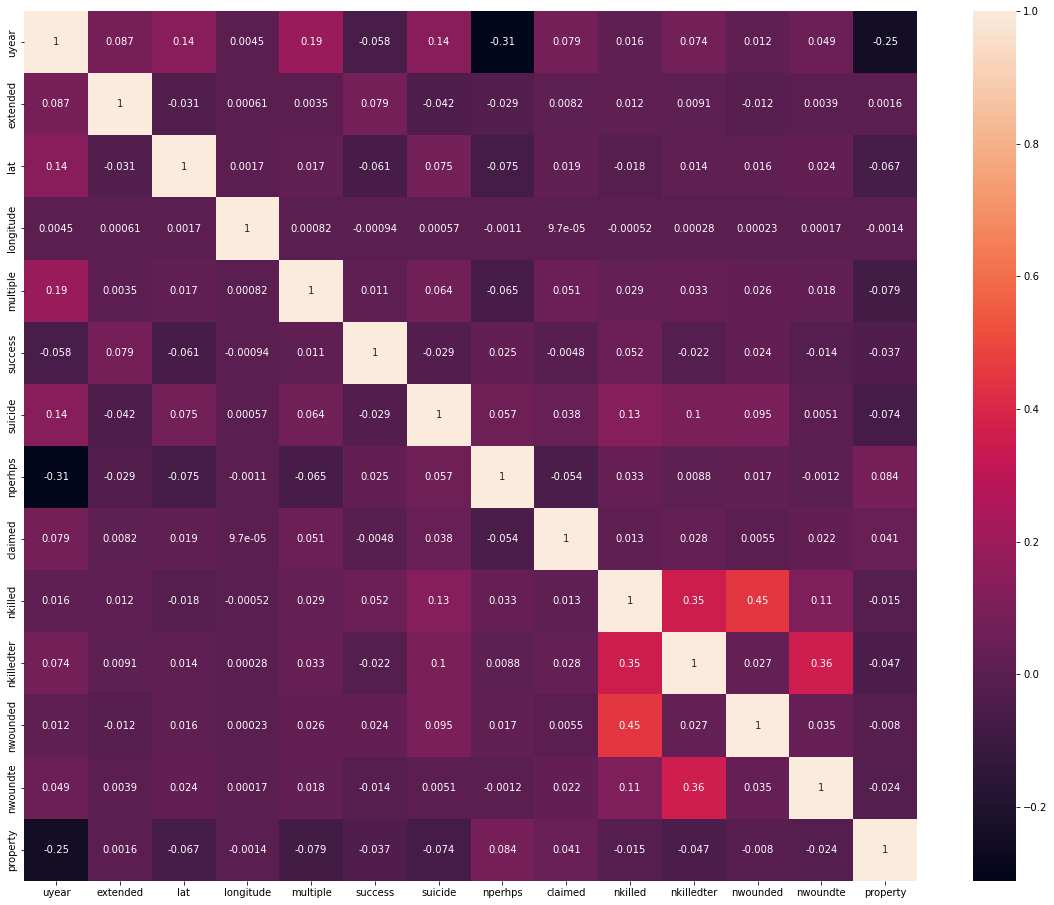

In [47]:
fig,axes = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df.corr(), annot =True)
plt.show()


# Heat map of Covariance among the set of variables


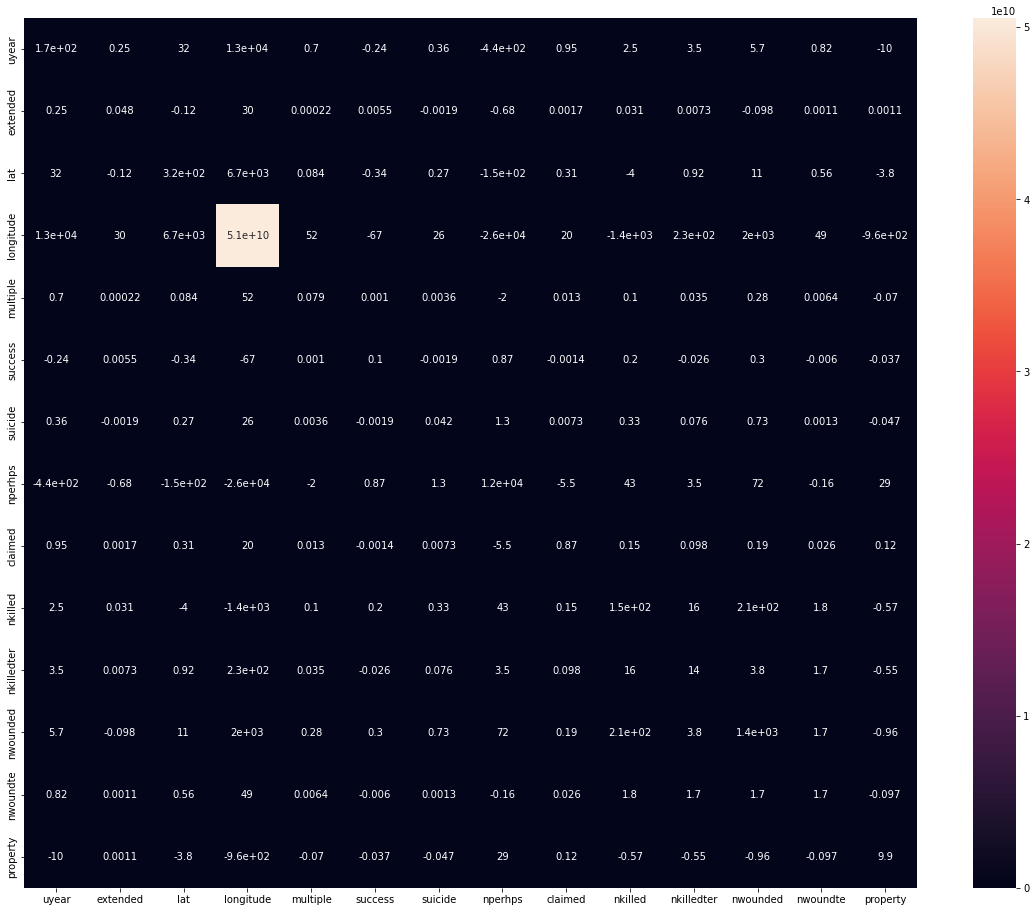

In [48]:
fig,axes = plt.subplots(1,1,figsize=(20,16))
sns.heatmap(df.cov(), annot =True)
plt.show()

# Pie Plot of Attacks types


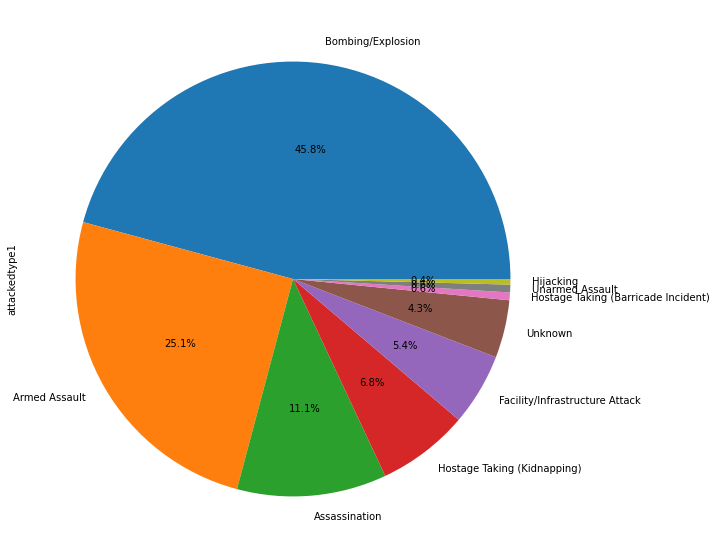

In [49]:
plt.figure(figsize=(10,10))
df['attackedtype1'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

# Pie plot for Weapon types used


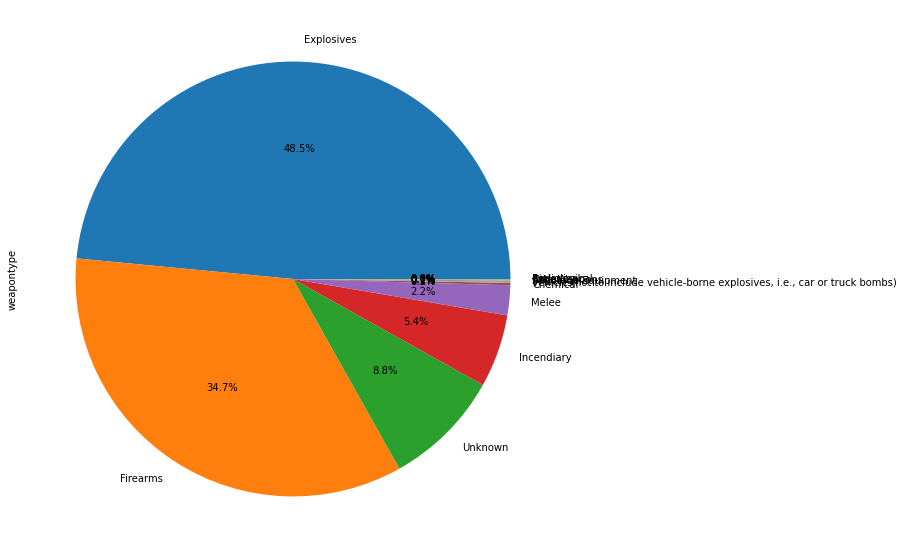

In [50]:
plt.figure(figsize=(10,10))
df['weapontype'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()


# Pie Plot by Regions


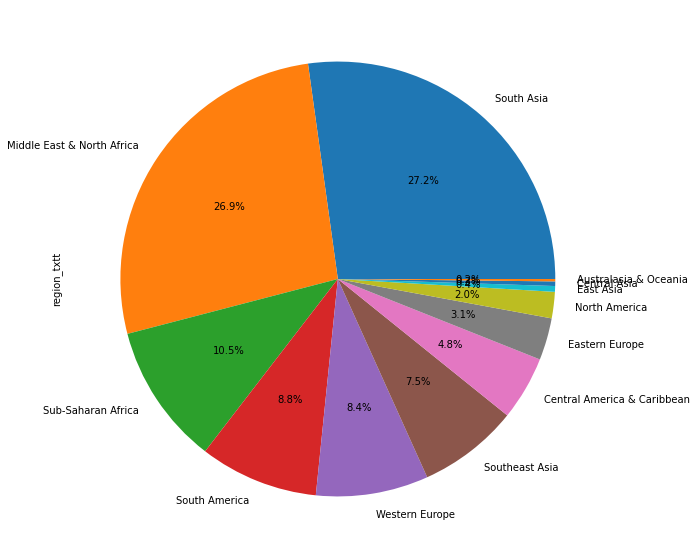

In [51]:
plt.figure(figsize=(10,10))
df['region_txtt'].value_counts().plot.pie(autopct ="%1.1f%%")
plt.show()

# Number of Terrorist activities by Regions


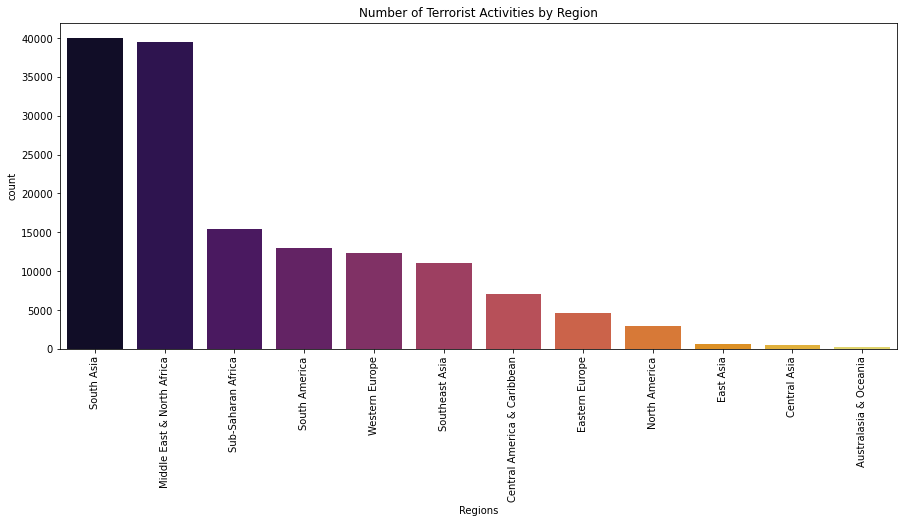

In [52]:
plt.subplots(figsize =(15,6))
sns.countplot('region_txtt',data=df,palette='inferno',order=df['region_txtt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number of Terrorist Activities by Region')
plt.show()

# Number of Terrorist Activities by Each Year


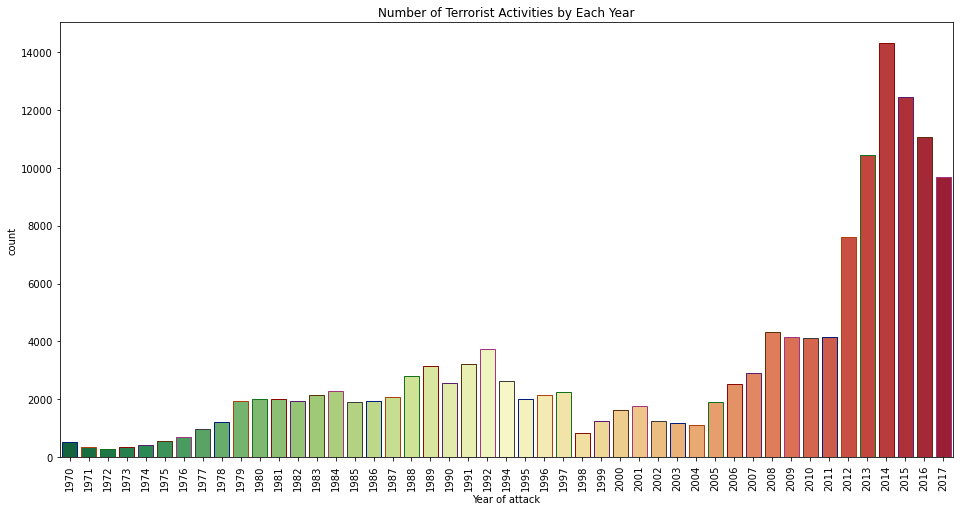

In [53]:
plt.subplots(figsize =(16,8))
sns.countplot('uyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',8))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number of Terrorist Activities by Each Year')
plt.show()

# Frequency of Attacks


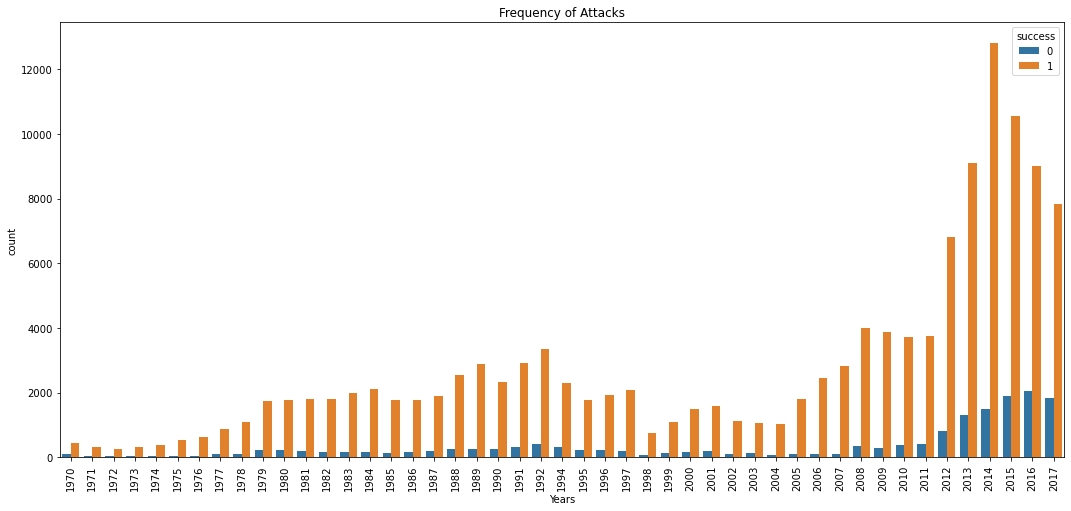

In [54]:
plt.subplots(figsize =(18,8))
sns.countplot(x=df['uyear'], hue ='success', data = df)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.title('Frequency of Attacks')
plt.show()

# Attacking Methods by Terrorists


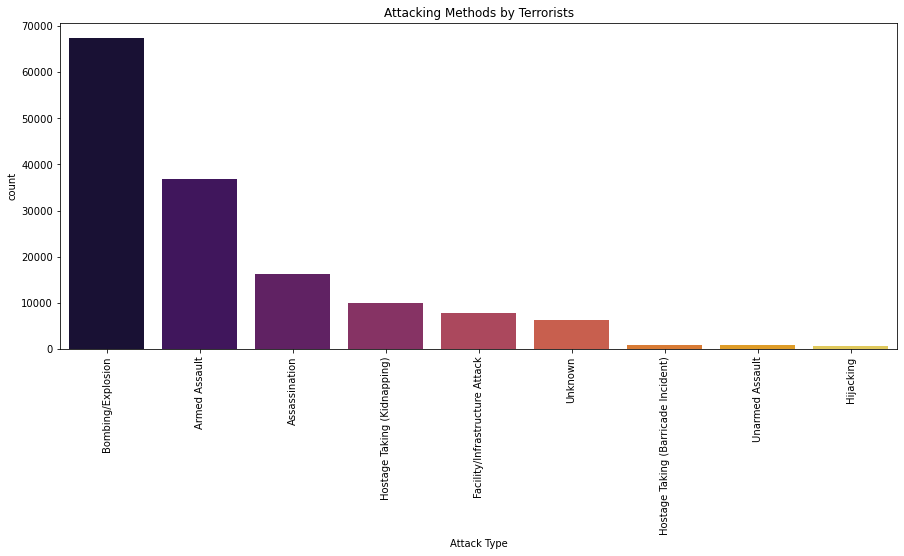

In [55]:
plt.subplots(figsize =(15,6))
sns.countplot('attackedtype1',data=df,palette='inferno',order=df['attackedtype1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

# Types of Weapons used by terrorists


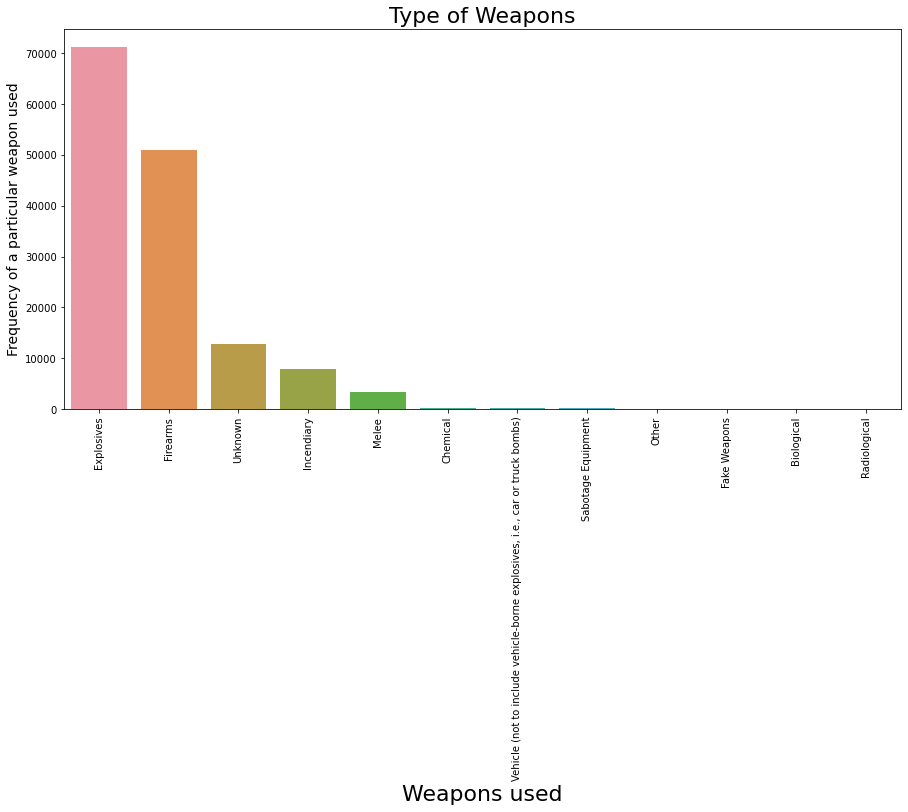

In [56]:
plt.figure(figsize =(15,7))
sns.barplot(x=df['weapontype'].value_counts()[:50].index,y =df['weapontype'].value_counts()[:50].values)
plt.xticks(rotation=90)
plt.xlabel('Weapons used', fontsize =22)
plt.ylabel("Frequency of a particular weapon used", fontsize =14)
plt.title("Type of Weapons", fontsize =22)
plt.show()

# Number of terrorist activities countrywise


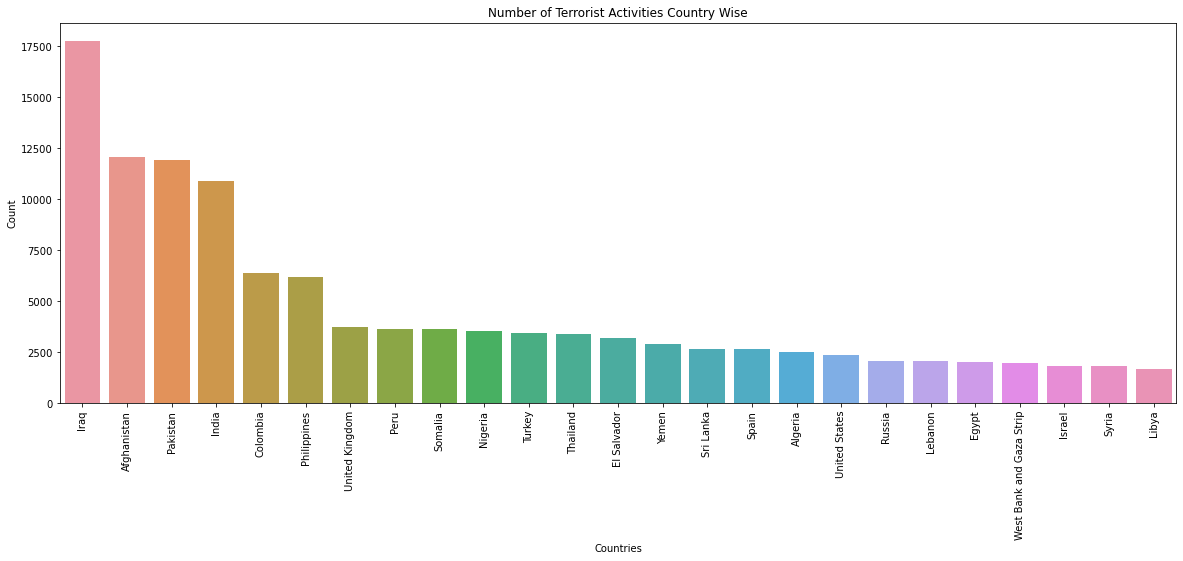

In [57]:
plt.figure(figsize =(20,7))
sns.barplot(x=df['country_txtt'].value_counts()[:25].index,y =df['country_txtt'].value_counts()[:25].values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title("Number of Terrorist Activities Country Wise")
plt.show()

# Number of Terrorist Activities by Region Wise


Text(0.5, 1.0, 'Number of Terrorist Activities Regionwise')

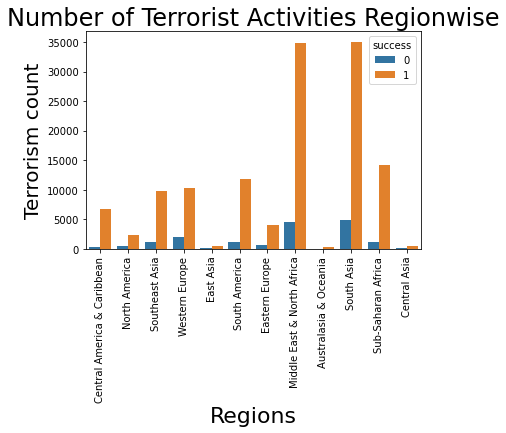

In [58]:
sns.countplot(x=df['region_txtt'], hue ='success', data=df)
plt.xlabel("Regions", fontsize =22)
plt.xticks(rotation=90)
plt.ylabel("Terrorism count", fontsize =20)
plt.title("Number of Terrorist Activities Regionwise", fontsize =24)

array([[<AxesSubplot:title={'center':'uyear'}>,
        <AxesSubplot:title={'center':'extended'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'multiple'}>,
        <AxesSubplot:title={'center':'success'}>,
        <AxesSubplot:title={'center':'suicide'}>,
        <AxesSubplot:title={'center':'nperhps'}>],
       [<AxesSubplot:title={'center':'claimed'}>,
        <AxesSubplot:title={'center':'nkilled'}>,
        <AxesSubplot:title={'center':'nkilledter'}>,
        <AxesSubplot:title={'center':'nwounded'}>],
       [<AxesSubplot:title={'center':'nwoundte'}>,
        <AxesSubplot:title={'center':'property'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

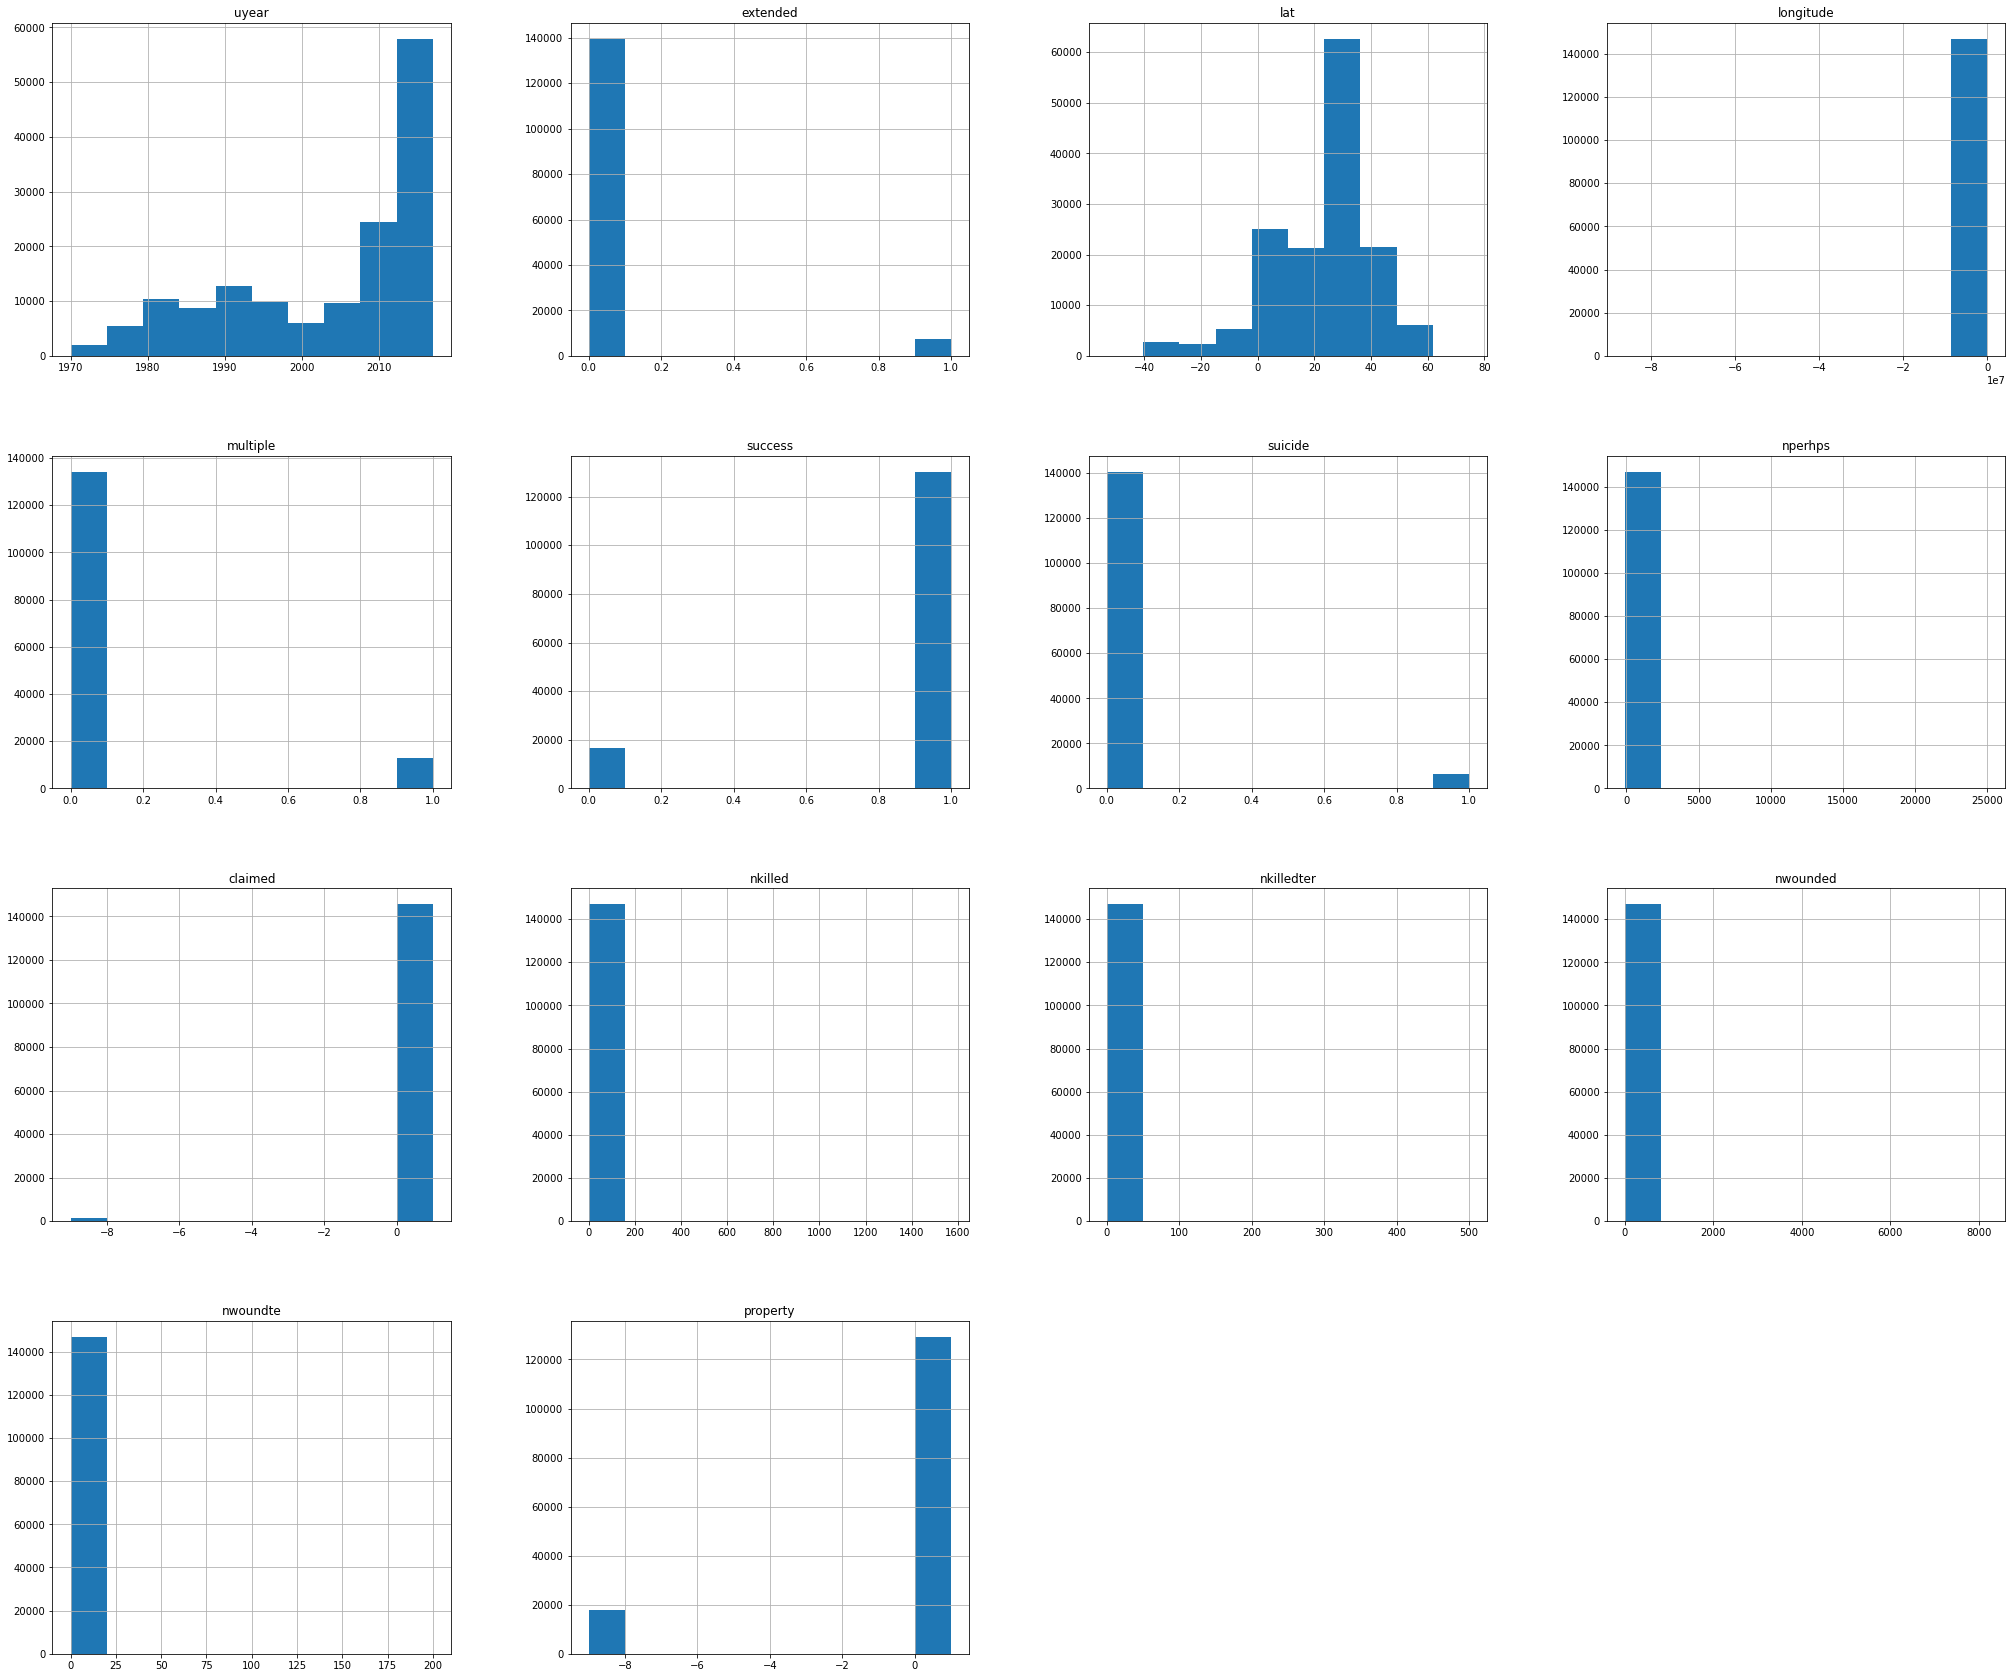

In [59]:
df.hist(figsize =(35,30))


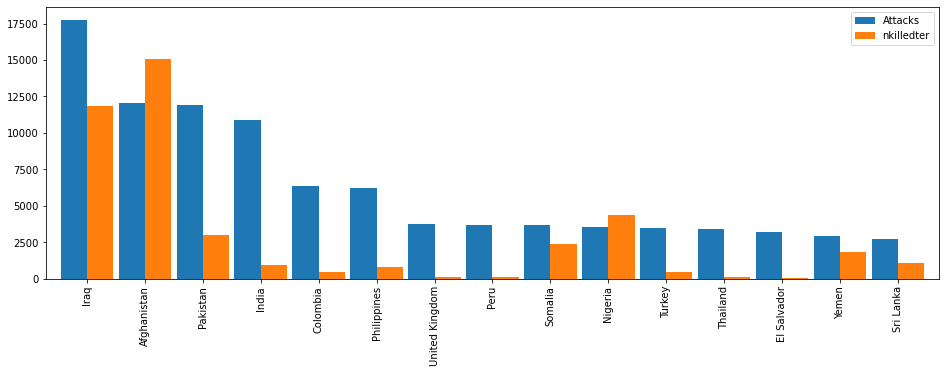

In [60]:
count_terror =df['country_txtt'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill =df.groupby('country_txtt')['nkilledter'].sum().to_frame()
count_terror.merge(count_kill,left_index =True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(16,5)
plt.show()

# Conclusion :

**Countries with the highest number of Terrorist Attacks: Iraq**

**Region with the highest number of Terrorist Attacks:Middle East & North Africa**

**Maximum number of people killed by a single terrorist attack are 1570 in iraq**

**Year with the more attacks: 2014**

**Month with the most Attacks: 5**

**Most Attack types: Bombing/Explosions**

**Year with Highest number of frequencies of attacks : 2014**